<a href="https://colab.research.google.com/github/myvnfapp/vnf/blob/master/kpi_VNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title  { display-mode: "form" }

# DEV par Jean-Paul Varga




from google.colab import files
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from termcolor import colored
import cv2
from google.colab import output
from google.colab import files
!rm /content/*.csv
print ("Bonjour, charger incidents.csv et demandes.csv")
uploaded = files.upload()
for fn in uploaded.keys():
  print('ok pour  "{name}" with length {length} bytes'.format(
       name=fn, length=len(uploaded[fn]))) 




GroupN1=["CHAPPUIS Yohann","MAURY David","BOUCHAHDANE Touria"]
GroupDTSO=["RIGELO Bruno","MARTIN-DAROCHA Renaud","FRANCOISE Patrick"]
GroupDem=["Créer une connaissance ","Demande d'achat","Facturation"]
GroupDemexclus=["DMAB" ,"CAB" ,"Gestionnaires"]



import xlwt 
import numpy as np
import pandas as pd
import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from datetime import datetime



incidents=pd.read_csv('incidents.csv', delimiter=";", encoding='ISO-8859-1').drop('Description',axis=1)
demandes=pd.read_csv('demandes.csv',delimiter=";", encoding='ISO-8859-1')

r=0
# dat=incidents["Date d'émission"].astype('datetime64[s]')
dat=incidents["Date d'émission"] = pd.to_datetime(incidents["Date d'émission"], format="%d/%m/%Y %H:%M")
dat_dem=demandes["Date d'émission"] = pd.to_datetime(demandes["Date d'émission"], format="%d/%m/%Y %H:%M")
#print (dat.max()-dat.min())

dur=[]
for t in incidents['Délai de résolution']:
    tt=(t.strip()).split(":")
    tt1=int(tt[0])*60
    tt2=int(tt[1])
    tt3=tt1+tt2
    dur.append(tt3)
   
   
incidents['temps']=dur

#print (incidents['temps'])
dur_dem=[]
for t in demandes['Délai de résolution']:
    tt=(t.strip()).split(":")
    tt1=int(tt[0])*60
    tt2=int(tt[1])
    tt3=tt1+tt2
    dur_dem.append(tt3)
   
   
demandes['temps']=dur_dem




dtso=[]
for t in incidents[[]] :
    print (t)
    dtso.append(t)
   
#incidents['dt']=dtso


def check_nan(value) -> bool:
    is_nan =  value != value
    return is_nan

def incidents_globaux():
    r=(incidents["N° d'Incident"] != '').sum()
    return r


def demandes_globaux():
    r1=demandes[(demandes["Libellé du service"] == GroupDem[0] ) | (demandes["Libellé du service"] == GroupDem[1]) | (demandes["Libellé du service"] == GroupDem[2])  ].count()[0]
    r2=demandes[(demandes["Résolu par (groupe)"] == GroupDemexclus[0] ) | (demandes["Résolu par (groupe)"] == GroupDemexclus[1]) | (demandes["Résolu par (groupe)"] == GroupDemexclus[2])  ].count()[0]
    r=(demandes["Soumis par"] != '').sum()-r1
    return r

def demandes_globaux_clot():
    demandes_ok=demandes[ ((demandes["Libellé du service"] != GroupDem[0] ) & (demandes["Libellé du service"] != GroupDem[1]) & (demandes["Libellé du service"] != GroupDem[2]) )   ]
    r1=demandes_ok[ (demandes_ok["Statut"] == 'Demande réalisée') |  (demandes_ok["Statut"] == 'Clôturé')   ]
    r=r1.count()[0]  
    return r
  

def connaissance_faitN1():
    # r=demandes[(demandes["Libellé du service"] == "Créer une connaissance ") & ((demandes["Soumis par"] == "CHAPPUIS Yohann") | (demandes["Soumis par"] == "MAURY David"))].count()['titre']
    r=demandes[(demandes["Libellé du service"] == "Créer une connaissance ") ].count()[0]
    return r


def demandes_faitN1():
    r=0
    for i in GroupN1:
        r1=demandes[(demandes["Soumis par"] == i ) ].count()
        r=r+r1
        
       
    return r



def demandes_faitN1_clo():
    r=0
    
    demandes_clo=demandes[  (demandes["Statut"] == 'Clôturé') | (demandes["Statut"] == 'Demande réalisée')      ]
    for i in GroupN1:
        r1=demandes_clo[(demandes["Soumis par"] == i )  ].count()['titre']
        r=r+r1
    return r




def incidents_clotures():

    r=(incidents["Statut"] == 'Clôturé').sum()+(incidents["Statut"] == 'Résolu').sum()
    return r


def incidents_clotures_dt(dt):
    
    r=incidents[((incidents["Enregistré par"] == 'MAURY David') | (incidents["Enregistré par"] == 'CHAPPUIS Yohann') & (incidents["Entité du bénéficiaire (complète)"] == 'dt'))].count()[1]
    return r    

def incidents_N1_resolus():
    r=0
    for i in GroupN1:
        r1=incidents[(incidents["Enregistré par"] == i)  & (incidents["Résolu par (groupe)"] == 'N1_ServiceDesk') ].count()[1]
        r=r+r1
    return r


def incidents_ouvertN1_et_resolus():
    r=0
    for i in GroupN1:
        r1=incidents[((incidents["Enregistré par"] == i) ) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) ].count()[1]
        r=r+r1
    return r


def incidents_N1_ouverts():
    r=-1
    for i in GroupN1:
        r1=incidents[(incidents["Enregistré par"] == i)] .count()[1]
        r=r+r1
    return r

def incidents_pri_p1():
    
    
    
    r=incidents[(incidents["Priorité"] == 1) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents.query("Priorité == 1 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 1) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 120)) ].count()[1]
    #r2=incidents.query("(Priorité == 1) and (Statut == 'Clôturé'  or Statut == 'Résolu') and (temps > 120 )  " )['temps'].count()[1]
    #print ("plus petit qus 120 ",r2)
    if check_nan(r1):
            r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    return [r,r1,r2]


def incidents_pri_p2():
    r=incidents[(incidents["Priorité"] == 2) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents.query("Priorité == 2 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 2) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 240)) ].count()[1]
    
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    
    return [r,r1,r2]

def incidents_pri_p3():
    r=incidents[(incidents["Priorité"] == 3) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents.query("Priorité == 3 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 3) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 1440)) ].count()[1]
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0


    return [r,r1,r2]

def incidents_pri_p4():
    r=incidents[(incidents["Priorité"] == 4) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents.query("Priorité == 4 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 4) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 7200)) ].count()[1]
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0


    return [r,r1,r2]    



#priorité pour les demandes

def demandes_pri_p(pri):
    lim=0

    if pri == 1:
         lim = 120

    if pri == 2:
        lim=240   
    if pri == 3:
         lim=1440
    if pri == 4:
         lim=7200

    demandes_ok_clo=demandes[ ((demandes["Statut"] == 'Clôturé') | (demandes["Statut"] == "Demande réalisée"))]
    demandes_ok=demandes_ok_clo[ ((demandes_ok_clo["Libellé du service"] != GroupDem[0]) & (demandes_ok_clo["Libellé du service"] != GroupDem[1])   & (demandes_ok_clo["Libellé du service"] != GroupDem[2])       )     ]
    
    r=demandes_ok[(demandes_ok["Priorité"] == pri)   ].count()[1]
    r1=demandes_ok.query("Priorité == @pri " )['temps'].mean()
    r2=demandes_ok[    ((demandes_ok["Priorité"] == pri) ) &   (demandes_ok["temps"] <= lim )   ].count()[1]
    #r2=demandes.query("(Priorité == 1) and (Statut == 'Clôturé'  or Statut == 'Résolu') and (temps > 120 )  " )['temps'].count()[1]
    #print ("plus petit qus 120 ",r2)
    if check_nan(r1):
            r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    
    return [r,r1,r2]



def incidents_clotureN1():
    r=incidents[((incidents["Statut"] == 'Clôturé') & (incidents["Résolu par (groupe)"] == 'N1_ServiceDesk'))] .count()[1]
    return r   

def incidents_N1_resolus_cloture():
    r=0
    for i in GroupN1:
        r1=incidents[(incidents["Enregistré par"] == i)  & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu'))].count()[1]
        r=r+r1
    return r



def incidents_cloture_bureautique():
    r1=incidents[(((incidents["Enregistré par"] == GroupN1[0]) | (incidents["Enregistré par"] == GroupN1[1])| (incidents["Enregistré par"] == GroupN1[2]) ) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ))& (incidents["Sujet (complet)"].str.contains('Bureautique'))]
    r3=incidents[(((incidents["Enregistré par"] == GroupN1[0]) | (incidents["Enregistré par"] == GroupN1[1])| (incidents["Enregistré par"] == GroupN1[2]) ) & (incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )& (incidents["Sujet (complet)"].str.contains('Bureautique'))].count()
    r2=r1['Sujet (complet)'].str.contains('Bureautique')
    aunb=0

    for au in r2:
        
        aunb=aunb+1
    
    r=aunb

 
    
    return r

def incidents_cloture_bureautique_clotN1():
    r1=incidents[(((  incidents["Enregistré par"] == GroupN1[0]) | (incidents["Enregistré par"] == GroupN1[1])| (incidents["Enregistré par"] == GroupN1[2]) )   & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ))& (incidents["Sujet (complet)"].str.contains('Bureautique')) & (incidents["Résolu par (groupe)"] == 'N1_ServiceDesk')]
    r2=r1['Sujet (complet)'].str.contains('Bureautique')
    aunb=0
    for au in r2:
        aunb=aunb+1
    r=aunb
    # print ("tot bureautique  par N1 : ", r)
    return r

def incidents_cloture_bureautique_clotN1_N2():
    r1=incidents[(((  incidents["Enregistré par"] == GroupN1[0]) | (incidents["Enregistré par"] == GroupN1[1])| (incidents["Enregistré par"] == GroupN1[2]) )   & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ))& (incidents["Sujet (complet)"].str.contains('Bureautique')) & ((incidents["Résolu par (groupe)"] == 'N1_ServiceDesk') | (incidents["Résolu par (groupe)"] == 'N2_Proximité-Siège') )]
    r2=r1['Sujet (complet)'].str.contains('Bureautique')
    aunb=0
    for au in r2:
        aunb=aunb+1
    r=aunb
    # print ("tot bureautique  par N1 : ", r)
    return r

# print (incidents_cloture_bureautique_clotN1_N2())



def incidents_par_groupe():
    r=incidents["Résolu par (groupe)"] .value_counts().to_frame()
    return r


def incidents_par_Nature():
    r=incidents["Origine"] .value_counts().to_frame()
    return r


def incidents_par_sujet():
    r=incidents["Sujet"] .value_counts().to_frame()
    return r

def demandes_par_groupe():
    demandes_ok1=demandes[ ((demandes["Statut"] == 'Clôturé') | (demandes["Statut"] == "Demande réalisée"))]
    demandes_ok=demandes_ok1[ ((demandes_ok1["Libellé du service"] != GroupDem[0]) & (demandes_ok1["Libellé du service"] != GroupDem[1])   & (demandes_ok1["Libellé du service"] != GroupDem[2])) ]
    r=demandes_ok["Résolu par (groupe)"] .value_counts().to_frame()
    return r

def demandes_par_Nature():
    demandes_ok=demandes[ ((demandes["Libellé du service"] != GroupDem[0]) & (demandes["Libellé du service"] != GroupDem[1])   & (demandes["Libellé du service"] != GroupDem[2])) ]
    r=demandes_ok["Origine de la demande"] .value_counts().to_frame()
    return r

def demandes_par_sujet():
    r=demandes["Libellé du service"] .value_counts().to_frame()
    return r

# def incidents_backlog():
#     # r=incidents[incidents["Date d'émission"]]
#     incidents["Date d'émission"]=pd.to_datetime(incidents["Date d'émission"], format="%d/%m/%Y %H:%M")
#     r=incidents["Date d'émission" <  incidents["datetime"] ]
#     print(type(r))
#     return r

# incidents["datetime"] = pd.datetime(datetime.now())
# incidents_backlog()

lb=0

# for inc_group in  incidents_backlog().itertuples():
#     lb=lb+1
#     print (inc_group[0]," ",inc_group[1])



    # sheet_dtso.write(lb, cb,inc_group[0],bord1)
    # sheet_dtso.write(lb, cb+1,inc_group[1],bord1)






def delai():
    r=incidents[((incidents["Statut"] == 'Clôturé') & (incidents["Résolu par (groupe)"] == 'N1_ServiceDesk'))] .count()[1]
    return r 






# EConocom
def incidents_pri_p1_N1():

    incidents_N1=incidents[   (incidents["Résolu par (groupe)"] == "N1_ServiceDesk")  &  (  (incidents["Enregistré par"] == GroupN1[0] ) |  (incidents["Enregistré par"] == GroupN1[1]  )   |  (incidents["Enregistré par"] == GroupN1[2]  )   )     ]
    r=incidents_N1[(incidents_N1["Priorité"] == 1) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents_N1.query("Priorité == 1 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents_N1[((incidents_N1["Priorité"] == 1) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') ) &   (incidents_N1["temps"] <= 120)) ].count()[1]
    #r2=incidents.query("(Priorité == 1) and (Statut == 'Clôturé'  or Statut == 'Résolu') and (temps > 120 )  " )['temps'].count()[1]
    #print ("plus petit qus 120 ",r2)_N1
    if check_nan(r1):
            r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0

      
    return [r,r1,r2]


def incidents_pri_p2_N1():
    # incidents_N1=incidents[   (incidents["Résolu par (groupe)"] == "N1_ServiceDesk") |  ( (incidents["Enregistré par"] == GroupN1[0])   |  (incidents["Enregistré par"] == GroupN1[1])     |  (incidents["Enregistré par"] == GroupN1[2])    )    ]
    
    incidents_N1=incidents[   (incidents["Résolu par (groupe)"] == "N1_ServiceDesk")  &  (  (incidents["Enregistré par"] == GroupN1[0] ) |  (incidents["Enregistré par"] == GroupN1[1]  )   |  (incidents["Enregistré par"] == GroupN1[2]  )   )     ]
     
    r=incidents_N1[(incidents_N1["Priorité"] == 2) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents_N1.query("Priorité == 2 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents_N1[((incidents_N1["Priorité"] == 2) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') ) &   (incidents_N1["temps"] <= 240)) ].count()[1]
   
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    
    return [r,r1,r2]

def incidents_pri_p3_N1():
    incidents_N1=incidents[   (incidents["Résolu par (groupe)"] == "N1_ServiceDesk")  &  (  (incidents["Enregistré par"] == GroupN1[0] ) |  (incidents["Enregistré par"] == GroupN1[1]  )   |  (incidents["Enregistré par"] == GroupN1[2]  )   )     ]
    r=incidents_N1[(incidents_N1["Priorité"] == 3) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents_N1.query("Priorité == 3 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents_N1[((incidents_N1["Priorité"] == 3) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') ) &   (incidents_N1["temps"] <= 240)) ].count()[1]
   
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    
    return [r,r1,r2]
    

def incidents_pri_p4_N1():
    
    incidents_N1=incidents[   (incidents["Résolu par (groupe)"] == "N1_ServiceDesk")  &  (  (incidents["Enregistré par"] == GroupN1[0] ) |  (incidents["Enregistré par"] == GroupN1[1]  )   |  (incidents["Enregistré par"] == GroupN1[2]  )   )     ]
    
    r=incidents_N1[(incidents_N1["Priorité"] == 4) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents_N1.query("Priorité == 4 and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
    r2=incidents_N1[((incidents_N1["Priorité"] == 4) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') ) &   (incidents_N1["temps"] <= 7200)) ].count()[1]
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
 
    return [r,r1,r2]    

# def incidents_pri_N1(pri):
#     incidents_N1=incidents[   (incidents["Résolu par (groupe)"] == "N1_ServiceDesk")  &  (  (incidents["Enregistré par"] == GroupN1[0] ) |  (incidents["Enregistré par"] == GroupN1[1]  )   |  (incidents["Enregistré par"] == GroupN1[2]  )   )     ]
#     r=incidents_N1[(incidents_N1["Priorité"] == pri) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') )  ].count()[1]
#     r1=incidents_N1.query("Priorité == @pri and (Statut == 'Clôturé'  or Statut == 'Résolu')" )['temps'].mean()
#     r2=incidents_N1[((incidents_N1["Priorité"] == pri) & ((incidents_N1["Statut"] == 'Clôturé') | (incidents_N1["Statut"] == 'Résolu') ) &   (incidents_N1["temps"] <= 7200)) ].count()[1]
#     if check_nan(r1):
#         r1=0
#     if check_nan(r2):
#         r2=0
#     if check_nan(r):
#         r=0
#     return [r,r1,r2]    






def incidents_par_Nature_N1():
    incidents_N1=incidents[(incidents["Enregistré par"] == GroupN1[0])   |  (incidents["Enregistré par"] == GroupN1[1])     |  (incidents["Enregistré par"] == GroupN1[2]) ]
    r=incidents_N1["Origine"] .value_counts().to_frame()
    return r


def incidents_par_Sujet_N1():
    incidents_N1=incidents[(incidents["Enregistré par"] == GroupN1[0])   |  (incidents["Enregistré par"] == GroupN1[1])     |  (incidents["Enregistré par"] == GroupN1[2]) ]
    r=incidents_N1["Sujet"] .value_counts().to_frame()
    return r


def demandes_par_Nature_N1():
    demandes_N1=demandes[(demandes["Soumis par"] == GroupN1[0])   |  (demandes["Soumis par"] == GroupN1[1])     |  (demandes["Soumis par"] == GroupN1[2]) ]
    r=demandes_N1["Origine de la demande"] .value_counts().to_frame()
    print (demandes_N1.count())
    return r

def demandes_par_Sujet_N1():
    demandes_N1=demandes[(incidents["Soumis par"] == GroupN1[0])   |  (demandes["Soumis par"] == GroupN1[1])     |  (demandes["Soumis par"] == GroupN1[2]) ]
    r=demandes_N1["Libellé du service"] .value_counts().to_frame()
    return r




def demandes_par_Nature_Eco():
    
    demandes_N1=demandes[(demandes["Soumis par"] == GroupN1[0])   |  (demandes["Soumis par"] == GroupN1[1])     |  (demandes["Soumis par"] == GroupN1[2]) ]
    r=demandes_N1["Origine de la demande"] .value_counts().to_frame()
    return r

def demandes_par_sujet_Eco():
    demandes_N1=demandes[(demandes["Soumis par"] == GroupN1[0])   |  (demandes["Soumis par"] == GroupN1[1])     |  (demandes["Soumis par"] == GroupN1[2]) ]
    r=demandes_N1["Libellé du service"] .value_counts().to_frame()
    return r






# DT

def incidents_DT_tot(ent):
    r=incidents[incidents["Entité du bénéficiaire (complète)"] == ent   ] .count()[0]
    return r

def demandes_DT_tot(ent):
    r=demandes[demandes["Entité du bénéficiaire (complète)"] == ent   ] .count()[0]
    return r




def incidents_DT_res_group(ent,group):
    r=incidents[(incidents["Entité du bénéficiaire (complète)"] == ent ) & (incidents["Résolu par (groupe)"] == group) ] .count()["Résolu par (groupe)"]
    #print (incidents[(incidents["Entité du bénéficiaire (complète)"] == ent ) & (incidents["Résolu par (groupe)"] == group) ])
    return r

def incidents_par_groupe_DT(dt):
    r=incidents[incidents["Entité du bénéficiaire (complète)"] == dt  ]
    #.value_counts().to_frame()
    #print (r)
    return r

def incidents_par_Nature_DT(ent):
    incidents_DT=incidents[(incidents["Entité du bénéficiaire (complète)"] == ent ) ]
    # incidents_dt=incidents[("Entité du bénéficiaire (complète)" == ent)]
    r=incidents_DT["Origine"] .value_counts().to_frame()
    return r

def incidents_par_Sujet_DT(ent):
    incidents_DT=incidents[(incidents["Entité du bénéficiaire (complète)"] == ent ) ]
    # incidents_dt=incidents[("Entité du bénéficiaire (complète)" == ent)]
    r=incidents_DT["Sujet"] .value_counts().to_frame()
    return r






def demandes_globaux_dt(ent):
    demandes_DT=demandes[(demandes["Entité du bénéficiaire (complète)"] == ent)        ]
    r1=demandes_DT[(demandes["Libellé du service"] == GroupDem[0] ) | (demandes["Libellé du service"] == GroupDem[1]) | (demandes["Libellé du service"] == GroupDem[2])  ].count()[0]
    r=(demandes_DT["Soumis par"] != '').sum()-r1
    return r


def demandes_globaux_dt_N1(ent):

    demandes_DT=demandes[(demandes["Entité du bénéficiaire (complète)"] == ent)    & ((demandes["Libellé du service"] != GroupDem[0]) & (demandes["Libellé du service"] !=  GroupDem[1]  )  & (demandes["Libellé du service"] !=  GroupDem[2]  ) ) ]
    r=demandes_DT[(demandes_DT["Soumis par"] == GroupN1[0] )  |  (demandes_DT["Soumis par"] == GroupN1[1] ) |  (demandes_DT["Soumis par"] == GroupN1[2] ) ].count()[0]
    return r


def demandes_globaux_dt_N2(ent):
    demandes_DT=demandes[(demandes["Entité du bénéficiaire (complète)"] == ent)    & ((demandes["Libellé du service"] != GroupDem[0]) & (demandes["Libellé du service"] !=  GroupDem[1]  )  & (demandes["Libellé du service"] !=  GroupDem[2]  ) ) ]
    r=demandes_DT[(demandes_DT["Soumis par"] ==   GroupDTSO[0] )  |  (demandes_DT["Soumis par"] == GroupDTSO[1] ) |  (demandes_DT["Soumis par"] == GroupDTSO[2] ) ].count()[0]
    return r


# incidents_par_Nature_DT.set_index("Origine")


#print (incidents_par_Nature_DT.loc)


# for inc_group in incidents_par_Nature_DT:
#     lb=lb+1
#     print (inc_group[0])



#     print(inc_group[1])


def incidents_N1_ouverts_DT(ent):
    r=0
    for i in GroupN1:
        r1=incidents[(incidents["Enregistré par"] == i)  & (incidents["Entité du bénéficiaire (complète)"] == ent )  ] .count()[1]
        r=r+r1
    return r


def incidents_N1_escalade_a_DT(ent):
    r=0
    for i in GroupN1:
        for j in GroupDTSO:
            r1=incidents[(incidents["Enregistré par"] == i)  & (incidents["Entité du bénéficiaire (complète)"] == ent ) & (incidents["Responsable"] == j )  ] .count()[1]
            r=r+r1
    return r


# priorité DT
def incidents_pri_p1_dt(ent):
      
    r=incidents[(incidents["Priorité"] == 1) & (incidents["Entité du bénéficiaire (complète)"] == ent) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu')     )  ].count()[1]
    r1=incidents[(incidents["Priorité"] == 1) & (incidents["Entité du bénéficiaire (complète)"] == ent)  & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )]['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 1) & (incidents["Entité du bénéficiaire (complète)"] == ent)   & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 120)  & (incidents["Entité du bénéficiaire (complète)"] == ent)   ) ].count()[1]
    #r2=incidents.query("(Priorité == 1) and (Statut == 'Clôturé'  or Statut == 'Résolu') and (temps > 120 )  " )['temps'].count()[1]
    # and 'Entité du bénéficiaire (complète)' == ent 
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0


    return [r,r1,r2]


def incidents_pri_p2_dt(ent):
    r=incidents[(incidents["Priorité"] == 2) & (incidents["Entité du bénéficiaire (complète)"] == ent) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents[(incidents["Priorité"] == 2) & (incidents["Entité du bénéficiaire (complète)"] == ent)  & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )]['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 2) & (incidents["Entité du bénéficiaire (complète)"] == ent)   & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 240)) ].count()[1]
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    return [r,r1,r2]

def incidents_pri_p3_dt(ent):
    r=incidents[(incidents["Priorité"] == 3) & (incidents["Entité du bénéficiaire (complète)"] == ent) & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[1]
    r1=incidents[(incidents["Priorité"] == 3) & (incidents["Entité du bénéficiaire (complète)"] == ent)  & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )]['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 3) & (incidents["Entité du bénéficiaire (complète)"] == ent)    & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 1440)) ].count()[1]
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    return [r,r1,r2]

def incidents_pri_p4_dt(ent):
    r=incidents[(incidents["Priorité"] == 4) & (incidents["Entité du bénéficiaire (complète)"] == ent)  & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )  ].count()[0]
    r1=incidents[(incidents["Priorité"] == 4) & (incidents["Entité du bénéficiaire (complète)"] == ent)  & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') )]['temps'].mean()
    r2=incidents[((incidents["Priorité"] == 4) & (incidents["Entité du bénéficiaire (complète)"] == ent)    & ((incidents["Statut"] == 'Clôturé') | (incidents["Statut"] == 'Résolu') ) &   (incidents["temps"] <= 7200)) ].count()[1]
    if check_nan(r1):
        r1=0
    if check_nan(r2):
        r2=0
    if check_nan(r):
        r=0
    return [r,r1,r2]    
    
def graph_categorie():
   # r= incidents['Sujet']
   #r=incidents.groupby('Sujet')["N° d'Incident"].nunique()
   r=incidents.groupby(by='Sujet', as_index=False).agg({"N° d'Incident": pd.Series.nunique})
   return r



def demandes_DT_par_Nature(ent):
    demandes_DT=demandes[(demandes["Entité du bénéficiaire (complète)"] == ent)        ]
    r=demandes_DT["Origine de la demande"] .value_counts().to_frame()
    return r

def demandes_DT_par_sujet(ent):
    demandes_DT=demandes[(demandes["Entité du bénéficiaire (complète)"] == ent)        ]
    r=demandes_DT["Libellé du service"] .value_counts().to_frame()
    return r









# Graph
# g1=Incidents["Origine"].series
# incidents.plot(kind="bar" , x=Origine,  Origine)



#Incident globaux

incidents_globaux=incidents_globaux()
incidents_clotures=incidents_clotures()
incidents_globaux_pour=round((incidents_clotures/incidents_globaux)*100,2)

incidents_N1_resolus=incidents_N1_resolus()
incidents_N1_ouverts=incidents_N1_ouverts()
incidents_N1_pour=round((incidents_N1_resolus/incidents_globaux)*100,2)
incidents_clotureN1=incidents_clotureN1()
incidents_N1_resolus_cloture=incidents_N1_resolus_cloture()
incidents_clotureN1_pour=round((incidents_N1_resolus_cloture/incidents_N1_ouverts)*100,2)
incidents_ouvertN1_et_resolus=incidents_ouvertN1_et_resolus()

incidents_pri_p1=incidents_pri_p1()
incidents_pri_p2=incidents_pri_p2()
incidents_pri_p3=incidents_pri_p3()
incidents_pri_p4=incidents_pri_p4()
incidents_pri_p1_tot=round((((incidents_pri_p1[2]+incidents_pri_p2[2]+incidents_pri_p3[2]+incidents_pri_p4[2])/incidents_clotures)*100),2)




incidents_sla=int((incidents_pri_p1[1]+incidents_pri_p2[1]+incidents_pri_p3[1]+incidents_pri_p4[1])/incidents_pri_p1[0]+incidents_pri_p2[0]+incidents_pri_p3[0]+incidents_pri_p4[0])
incidents_cloture_bureautique=incidents_cloture_bureautique()
incidents_cloture_bureautique_clotN1=incidents_cloture_bureautique_clotN1()
incidents_cloture_bureautique_clotN1_N2=incidents_cloture_bureautique_clotN1_N2()
incidents_AutonomieN1_pou=round((incidents_cloture_bureautique_clotN1/incidents_cloture_bureautique)*100,2)
incidents_AutonomieN1_N2_pou=round((incidents_cloture_bureautique_clotN1_N2/incidents_cloture_bureautique)*100,2)





incidents_par_groupe=(incidents_par_groupe())
incidents_DTCB_tot=incidents_DT_tot("DT CENTRE BOURGOGNE")
incidents_DTNPC_tot=incidents_DT_tot("DT NORD - PAS-DE-CALAIS")
incidents_DTRS_tot=incidents_DT_tot("DT RHONE-SAONE")
incidents_DTBS_tot=incidents_DT_tot("DT SEINE")
incidents_DTS_tot=incidents_DT_tot("DT STRASBOURG")
incidents_DTNE_tot=incidents_DT_tot("DT NORD-EST")
incidents_DTSO_tot=incidents_DT_tot("DT SUD-OUEST")

demandes_DTCB_tot=demandes_DT_tot("DT CENTRE BOURGOGNE")
demandes_DTNPC_tot=demandes_DT_tot("DT NORD - PAS-DE-CALAIS")
demandes_DTRS_tot=demandes_DT_tot("DT RHONE-SAONE")
demandes_DTBS_tot=demandes_DT_tot("DT SEINE")
demandes_DTS_tot=demandes_DT_tot("DT STRASBOURG")
demandes_DTNE_tot=demandes_DT_tot("DT NORD-EST")
demandes_DTSO_tot=demandes_DT_tot("DT SUD-OUEST")
 


D1_demandes_globaux=demandes_globaux()
demandes_faitN1=demandes_faitN1()
connaissance_faitN1=connaissance_faitN1()





workbook = xlwt.Workbook()

rouge = xlwt.easyxf('font:color red')
vert = xlwt.easyxf('font:color green')
bord1=xlwt.easyxf('borders: top_color green, bottom_color green, right_color green, left_color green,left thin, right thin, top thin, bottom thin;pattern: pattern solid, fore_color white;')

bord1_B=xlwt.easyxf( 'font:color white; borders: top_color green, bottom_color green, right_color green, left_color green,left thin, right thin, top thin, bottom thin;  pattern: pattern solid, fore_color blue; ')
bord1_G=xlwt.easyxf( 'font:color white; borders: top_color green, bottom_color green, right_color green, left_color green,left thin, right thin, top thin, bottom thin;  pattern: pattern solid, fore_color green; ')


sheet = workbook.add_sheet('kpi Glo')
sheet_N1 = workbook.add_sheet('kpi Econocom')
sheet1 = workbook.add_sheet('kpi DT')

sheet_dtso = workbook.add_sheet('kpi DTSO')
sheet_dtrs = workbook.add_sheet('kpi DTRS')
sheet_dtnpc = workbook.add_sheet('kpi DTNPC')
sheet_dts = workbook.add_sheet('kpi DTS')
sheet_dtbc = workbook.add_sheet('kpi DTBC')
sheet_dtne = workbook.add_sheet('kpi DTNE')
sheet_dtbs = workbook.add_sheet('kpi DTBS')
sheet_dtbs = workbook.add_sheet('kpi SCSNE')
sheet_manuel = workbook.add_sheet("Mode d'emploi")


# Incidents / Demandes globaux




sheet.write(0, 0,"dates du fichier incidents = "+str(dat.min())+" à "+str(dat.max()))
sheet.write(0, 3,"dates du fichier demandes  = "+str(dat_dem.min())+" à "+str(dat_dem.max()))

l=2
c=0
sheet.col(0).width=14000
sheet.col(1).width=4000
sheet.col(2).width=400

sheet.write(l, c,"Indicateurs",bord1_B)
sheet.write(l, c+1,"Valeurs",bord1_B)

l=l+1
sheet.write(l, c,"I1.incidents globaux (Tous les incidents) ",bord1)
sheet.write(l, c+1,str(incidents_globaux),bord1)

l=l+1
sheet.write(l, c,"I2.incidents globaux   (avec statut =Cloturés et résolus)  ",bord1)
sheet.write(l, c+1,str(incidents_clotures))
l=l+1
sheet.write(l, c,"I3.incidents globaux (avec statut =Cloturés et résolus) en % ",bord1)
sheet.write(l, c+1,str(incidents_globaux_pour)+" %",bord1)


l=l+2
sheet.write(l, c,"I4.Tous les Incidents (ouvert par N1 + sujet = Bureautique) ",bord1)
sheet.write(l, c+1,str(incidents_cloture_bureautique),bord1)


l=l+2
sheet.write(l, c,"SLA Incidents",bord1_B)
sheet.write(l, c+1,"Valeurs",bord1_B)
l=l+1



sheet.write(l, c,"I5.SLA global (durée moy d'un incident) ",bord1)
sheet.write(l, c+1,str(int(incidents_sla//60))+" H "+str(int(incidents_sla%60))+" min",bord1)


l=l+1
sheet.write(l, c,"I6.SLA global (durée moy d'un incident) en % ",bord1)
sheet.write(l, c+1,str(incidents_pri_p1_tot)+" %",bord1)


l=l+2
sheet.write(l, c,"I7.Priorités Incidents  (P1) ",bord1_B)
sheet.write(l, c+1,"Valeurs",bord1_B)
l=l+1
sheet.write(l, c,"nb de P1",bord1)
sheet.write(l, c+1,str(incidents_pri_p1[0]),bord1)
l=l+1
sheet.write(l, c,"Temps moy tot. P1")
sheet.write(l, c+1,str(int(incidents_pri_p1[1]//60))+" H "+str(int(incidents_pri_p1[1]%60)),bord1)
l=l+1
sheet.write(l, c,"nb P1 < 2 H",bord1)
sheet.write(l, c+1,str( int(incidents_pri_p1[2]) ),bord1)
l=l+1
sheet.write(l, c,"nb P1 < 2 H en %",bord1)
if incidents_pri_p1[0] !=0:
    sheet.write(l, c+1,str( round( (incidents_pri_p1[2]/incidents_pri_p1[0]) * 100,2))+" %",bord1)

l=l+1
sheet.write(l, c,"I8.Priorités Incidents    (P2) ",bord1_B)
sheet.write(l, c+1,"Valeurs",bord1_B)
l=l+1

sheet.write(l, c,"nb de P2",bord1)
sheet.write(l, c+1,str(incidents_pri_p2[0]),bord1)
l=l+1
sheet.write(l, c,"Temps moy tot. P2",bord1)
if incidents_pri_p2[1] !=0:
    sheet.write(l, c+1,str(int(incidents_pri_p2[1]//60))+" H "+str(int(incidents_pri_p2[1]%60)),bord1)
l=l+1
sheet.write(l, c,"nb P2 < 4 H")
sheet.write(l, c+1,str( int(incidents_pri_p2[2]) ),bord1)
l=l+1
sheet.write(l, c,"nb P2 < 4 H en %",bord1)
if incidents_pri_p2[0] !=0:
    sheet.write(l, c+1,str( round( (incidents_pri_p2[2]/incidents_pri_p2[0]) * 100,2))+" %",bord1)

l=l+1
sheet.write(l, c,"I9.Priorités Incidents   (P3) ",bord1_B)
sheet.write(l, c+1,"Valeurs",bord1_B)
l=l+1
sheet.write(l, c,"nb de P3")
sheet.write(l, c+1,str(incidents_pri_p3[0]),bord1)
l=l+1
sheet.write(l, c,"Temps moy tot. P3")
sheet.write(l, c+1,str(int(incidents_pri_p3[1]//60))+" H "+str(int(incidents_pri_p3[1]%60)),bord1)
l=l+1
sheet.write(l, c,"nb P3 < 12 H",bord1)
sheet.write(l, c+1,str( int(incidents_pri_p3[2]) ),bord1)
l=l+1
sheet.write(l, c,"nb P3 < 12 H en %",bord1)
if incidents_pri_p3[0] !=0:
    sheet.write(l, c+1,str( round( (incidents_pri_p3[2]/incidents_pri_p3[0]) * 100,2))+" %",bord1)

l=l+1
sheet.write(l, c,"I10.Priorités Incidents    (P4) ",bord1_B)
sheet.write(l, c+1,"Valeurs",bord1_B)
l=l+1



sheet.write(l, c,"nb de P4",bord1)
sheet.write(l, c+1,str(incidents_pri_p4[0]),bord1)
l=l+1
sheet.write(l, c,"Temps moy tot. P4",bord1)
sheet.write(l, c+1,str(int(incidents_pri_p4[1]//60))+" H "+str(int(incidents_pri_p4[1]%60)),bord1)
l=l+1
sheet.write(l, c,"nb P4 < 5 jours",bord1)
sheet.write(l, c+1,str( int(incidents_pri_p4[2]) ),bord1)
l=l+1
sheet.write(l, c,"nb P4 < 5 jours en %",bord1)
if incidents_pri_p4[0] !=0:
    sheet.write(l, c+1,str( round( (incidents_pri_p4[2]/incidents_pri_p4[0]) * 100,2))+" %",bord1)









l=2
c=3
sheet.col(c).width=14000
sheet.col(c+1).width=4000
sheet.col(c+2).width=400

sheet.write(l, c,"Indicateurs",bord1_G)
sheet.write(l, c+1,"Valeurs",bord1_G)

l=l+2
sheet.write(l, c,"D1.Demandes globales(sauf connaissance/achat) ",bord1)
sheet.write(l, c+1,str(D1_demandes_globaux),bord1)


l=l+1
sheet.write(l, c,"D2.connaissances crées",bord1)
sheet.write(l, c+1,str(connaissance_faitN1),bord1)



l=l+1
sheet.write(l, c,"D3.Demandes globales closes (sauf connaissance/achat)",bord1)
sheet.write(l, c+1,str(demandes_globaux_clot()),bord1)

l=l+1
sheet.write(l, c,"D4.Demandes globales closes % (sauf connaissance/achat)",bord1)
sheet.write(l, c+1,str(round((demandes_globaux_clot()/demandes_globaux())*100,2)    )+" %",bord1)






# print (demandes_pri_p(4))




l=l+1
l=l+2

l=l+1
sheet.write(l, c,"D5. Priorités demandes    (P1) ",bord1_G)
sheet.write(l, c+1,"Valeurs",bord1_G)
l=l+1
sheet.write(l, c,"nb de P1",bord1)
sheet.write(l, c+1,str(demandes_pri_p(1)[0]),bord1)
l=l+1
sheet.write(l, c,"Temps moy tot. P1",bord1)
sheet.write(l, c+1,str(int(demandes_pri_p(1)[1]//60))+" H "+str(int(demandes_pri_p(1)[1]%60)),bord1)
l=l+1
sheet.write(l, c,"nb P1 < 2 heures ",bord1)
sheet.write(l, c+1,str( int(demandes_pri_p(1)[2]) ),bord1)
l=l+1
sheet.write(l, c,"nb P1 < 2 heures  en %",bord1)
if demandes_pri_p(1)[0] !=0:
    sheet.write(l, c+1,str( round( (demandes_pri_p(1)[2]/demandes_pri_p(1)[0]) * 100,2))+" %",bord1)

l=l+2

sheet.write(l, c,"D6.Priorités demandes    (P2) ",bord1_G)
sheet.write(l, c+1,"Valeurs",bord1_G)
l=l+1

sheet.write(l, c,"nb de P2",bord1)
sheet.write(l, c+1,str(demandes_pri_p(2)[0]),bord1)
l=l+1
sheet.write(l, c,"Temps moy tot. P2",bord1)
sheet.write(l, c+1,str(int(demandes_pri_p(2)[1]//60))+" H "+str(int(demandes_pri_p(2)[1]%60)),bord1)
l=l+1
sheet.write(l, c,"nb P2 < 4 heures ",bord1)
sheet.write(l, c+1,str( int(demandes_pri_p(2)[2]) ),bord1)
l=l+1
sheet.write(l, c,"nb P2 < 4 heures  en %",bord1)
if demandes_pri_p(2)[0] !=0:
    sheet.write(l, c+1,str( round( (demandes_pri_p(2)[2]/demandes_pri_p(2)[0]) * 100,2))+" %",bord1)



l=l+2
sheet.write(l, c,"D7.Priorités demandes    (P3) ",bord1_G)
sheet.write(l, c+1,"Valeurs",bord1_G)
l=l+1
sheet.write(l, c,"nb de P3",bord1)
sheet.write(l, c+1,str(demandes_pri_p(3)[0]),bord1)
l=l+1
sheet.write(l, c,"Temps moy tot. P3")
sheet.write(l, c+1,str(int(demandes_pri_p(3)[1]//60))+" H "+str(int(demandes_pri_p(3)[1]%60)),bord1)
l=l+1
sheet.write(l, c,"nb P3 < 12 heures ",bord1)
sheet.write(l, c+1,str( int(demandes_pri_p(3)[2]) ),bord1)
l=l+1
sheet.write(l, c,"nb P3 < 12 heures  en %")
if demandes_pri_p(3)[0] !=0:
    sheet.write(l, c+1,str( round( (demandes_pri_p(3)[2]/demandes_pri_p(3)[0]) * 100,2))+" %",bord1)



l=l+2
sheet.write(l, c,"D8.Priorités demandes   (P4) ",bord1_G)
sheet.write(l, c+1,"Valeurs",bord1_G)
l=l+1
sheet.write(l, c,"nb de P4")
sheet.write(l, c+1,str(demandes_pri_p(4)[0]),bord1)
l=l+1
sheet.write(l, c,"Temps moy tot. P4",bord1)
sheet.write(l, c+1,str(int(demandes_pri_p(4)[1]//60))+" H "+str(int(demandes_pri_p(4)[1]%60)),bord1)
l=l+1
sheet.write(l, c,"nb P4< 12 heures ",bord1)
sheet.write(l, c+1,str( int(demandes_pri_p(4)[2]) ),bord1)
l=l+1
sheet.write(l, c,"nb P4 < 5 jours   en %",bord1)
if demandes_pri_p(4)[0] !=0:
    sheet.write(l, c+1,str( round( (demandes_pri_p(4)[2]/demandes_pri_p(4)[0]) * 100,2))+" %",bord1)






#tableau par groupe
lb=2
cb=6
sheet.col(cb).width=14000
sheet.col(cb+1).width=4000

sheet.write(lb, cb,"I23.Incidents par Groupe",vert)
lb=lb+1

sheet.write(lb, cb,"Groupe",bord1_B)
sheet.write(lb, cb+1,"Valeurs",bord1_B)

for inc_group in incidents_par_groupe.itertuples():
    lb=lb+1
    sheet.write(lb, cb,inc_group[0],bord1)
    sheet.write(lb, cb+1,inc_group[1],bord1)


lb=lb+2

sheet.write(lb, cb,"I24.Incidents  par Nature",vert)
lb=lb+1
sheet.write(lb, cb,"Nature",bord1_B)
sheet.write(lb, cb+1,"Valeurs",bord1_B)

for inc_group in incidents_par_Nature().itertuples():
    lb=lb+1
    sheet.write(lb, cb,inc_group[0],bord1)
    sheet.write(lb, cb+1,inc_group[1],bord1)



lb=lb+2

sheet.write(lb, cb,"I25.Top 10 : Incidents par sujet",vert)
lb=lb+1
sheet.write(lb, cb,"Sujet",bord1_B)
sheet.write(lb, cb+1,"Valeurs",bord1_B)
cp=0
for inc_group in incidents_par_sujet().itertuples():
    lb=lb+1
    cp=cp+1
    if cp < 11:
        sheet.write(lb, cb,inc_group[0],bord1)
        sheet.write(lb, cb+1,inc_group[1],bord1)






# idem mais par DEmandes


lb=2
cb=10
sheet.col(cb).width=14000
sheet.col(cb+1).width=4000

sheet.write(lb, cb,"D19.Demandes par Groupe",vert)
lb=lb+1

sheet.write(lb, cb,"Groupe",bord1_G)
sheet.write(lb, cb+1,"Valeurs",bord1_G)

lb=lb+1
for inc_group in demandes_par_groupe().itertuples():
    
    if inc_group[0] !="DMAB" and inc_group[0] !="CAB" and inc_group[0] !="Gestionnaires" :
        sheet.write(lb, cb,inc_group[0],bord1)
        sheet.write(lb, cb+1,inc_group[1],bord1)
        lb=lb+1



lb=lb+2

sheet.write(lb, cb,"D20.DEmandes par Nature",vert)
lb=lb+1
sheet.write(lb, cb,"Nature",bord1_G)
sheet.write(lb, cb+1,"Valeurs",bord1_G)


for inc_group in demandes_par_Nature().itertuples():
    lb=lb+1
    sheet.write(lb, cb,inc_group[0],bord1)
    sheet.write(lb, cb+1,inc_group[1],bord1)
    


lb=lb+2

sheet.write(lb, cb,"D21.Top 10 : Demandes par sujet",vert)
lb=lb+1
sheet.write(lb, cb,"Sujet",bord1_G)
sheet.write(lb, cb+1,"Valeurs",bord1_G)
cp=1
for inc_group in demandes_par_sujet().itertuples():
    lb=lb+1
   
    if cp < 11:
         if inc_group[0] !="Facturation" and inc_group[0] !="Demande d'achat"  :
            sheet.write(lb, cb,inc_group[0],bord1)
            sheet.write(lb, cb+1,inc_group[1],bord1)
            cp=cp+1


#demandes_par_Nature_Eco





# graph_I23 = workbook.add_chart({'type': 'column'})     
# graph_I23.add_series({'values': '=sheet!$G$4:$H$16'})
# sheet.insert_chart('G17', graph_I23)



#KPI feuille kpi DT


#remplir feuilles DT
incidents_clotures_dtso=incidents_clotures_dt("DT SUD-OUEST")
incidents_DT_res_N1=incidents_DT_res_group("DT SUD-OUEST","N1_ServiceDesk")
incidents_DT_res_N2=incidents_DT_res_group("DT SUD-OUEST","N2_Proximité_DTSO")


l1=2
c1=0

sheet1.col(c1).width=14000
sheet1.col(c1+1).width=4000
sheet1.col(c1+2).width=400


sheet1.write(l1, c1,"Indicateurs",vert)
sheet1.write(l1, c1+1,"Valeurs",vert)

l1=l1+2
sheet1.write(l1, c1,"DTI1.incidents globaux DTCB",bord1)
sheet1.write(l1, c1+1,str(incidents_DTCB_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTI2.incidents globaux DTNPC",bord1)
sheet1.write(l1, c1+1,str(incidents_DTNPC_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTI3.incidents globaux DTRS",bord1)
sheet1.write(l1, c1+1,str(incidents_DTRS_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTI4.incidents globaux DTBS",bord1)
sheet1.write(l1, c1+1,str(incidents_DTBS_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTI5.incidents globaux DTS",bord1)
sheet1.write(l1, c1+1,str(incidents_DTS_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTI6.incidents globaux DTNE",bord1)
sheet1.write(l1, c1+1,str(incidents_DTNE_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTI6.incidents globaux DTSO",bord1)
sheet1.write(l1, c1+1,str(incidents_DTSO_tot),bord1)


l1=2
c1=3
sheet1.col(c1).width=14000
sheet1.col(c1+1).width=4000
sheet1.col(c1+2).width=400
sheet1.write(l1, c1,"demandes",vert)
sheet1.write(l1, c1+1,"Valeurs",vert)
l1=l1+2
sheet1.write(l1, c1,"DTD1.demandes globaux DTCB",bord1)
sheet1.write(l1, c1+1,str(demandes_DTCB_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTD2.demandes globaux DTNPC",bord1)
sheet1.write(l1, c1+1,str(demandes_DTNPC_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTD3.demandes globaux DTRS",bord1)
sheet1.write(l1, c1+1,str(demandes_DTRS_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTD4.demandes globaux DTBS",bord1)
sheet1.write(l1, c1+1,str(demandes_DTBS_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTD5.demandes globaux DTS",bord1)
sheet1.write(l1, c1+1,str(demandes_DTS_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTD6.demandes globaux DTNE",bord1)
sheet1.write(l1, c1+1,str(demandes_DTNE_tot),bord1)
l1=l1+1
sheet1.write(l1, c1,"DTD6.demandes globaux DTSO",bord1)
sheet1.write(l1, c1+1,str(demandes_DTSO_tot),bord1)







#KPI feuille kpi DTSO

l2=2
c2=0
sheet_dtso.col(c2).width=14000
sheet_dtso.col(c2+1).width=4000
sheet_dtso.col(c2+2).width=400

sheet_dtso.write(l2, c2,"Indicateurs",bord1_B)
sheet_dtso.write(l2, c2+1,"Valeurs",bord1_B)

l2=l2+2
sheet_dtso.write(l2, c2,"DTI1.incidents globaux DTSO",bord1)
sheet_dtso.write(l2, c2+1,str(incidents_DTSO_tot),bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI2.incidents globaux DTSO resolu par N1",bord1)
sheet_dtso.write(l2, c2+1,str(incidents_DT_res_N1),bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI3.incidents globaux DTSO resolu par N2",bord1)
sheet_dtso.write(l2, c2+1,str(incidents_DT_res_N2),bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI5.incidents DTSO ouvert par le N1  ",bord1)
sheet_dtso.write(l2, c2+1,str(incidents_N1_ouverts_DT("DT SUD-OUEST")),bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI6.incidents DTSO ouvert par le N1  / transféré N2 DTSO ",bord1)
sheet_dtso.write(l2, c2+1,str(incidents_N1_escalade_a_DT("DT SUD-OUEST")),bord1)



l2=l2+3
sheet_dtso.write(l2, c2,"DTI7.incidents en priorité P1",bord1)
incidents_pri_p1_dt=incidents_pri_p1_dt("DT SUD-OUEST")
sheet_dtso.write(l2, c2+1,str(incidents_pri_p1_dt[0]),bord1)

l2=l2+1
sheet_dtso.write(l2, c2,"DTI8.Temps moy tot. P1",bord1)
sheet_dtso.write(l2, c2+1,str(int(incidents_pri_p1_dt[1])//60)+" H " + str(int(incidents_pri_p1_dt[1])%60)+" min ",bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI9.nb P1 < 2 H",bord1)
sheet_dtso.write(l2, c2+1,str(incidents_pri_p1_dt[2]),bord1)
l2=l2+2
sheet_dtso.write(l2, c2,"DTI10.incidents en priorité P2",bord1)
incidents_pri_p2_dt=incidents_pri_p2_dt("DT SUD-OUEST")
sheet_dtso.write(l2, c2+1,str(incidents_pri_p2_dt[0]),bord1)


l2=l2+1
sheet_dtso.write(l2, c2,"DTI11.Temps moy tot. P2",bord1)
sheet_dtso.write(l2, c2+1,str(int(incidents_pri_p2_dt[1])//60)+" H " + str(int(incidents_pri_p2_dt[1])%60)+" min ",bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI12.nb P2 < 4 H",bord1)
sheet_dtso.write(l2, c2+1,str(incidents_pri_p2_dt[2]),bord1)

l2=l2+2
sheet_dtso.write(l2, c2,"DTI13.incidents en priorité P3",bord1)
incidents_pri_p3_dt=incidents_pri_p3_dt("DT SUD-OUEST")
sheet_dtso.write(l2, c2+1,str(incidents_pri_p3_dt[0]),bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI14.Temps moy tot. P3",bord1)
sheet_dtso.write(l2, c2+1,str(int(incidents_pri_p3_dt[1])//60)+" H " + str(int(incidents_pri_p3_dt[1])%60)+" min ",bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI15.nb P3 < 12 H",bord1)
sheet_dtso.write(l2, c2+1,str(incidents_pri_p3_dt[2]),bord1)

l2=l2+2
sheet_dtso.write(l2, c2,"DTI18.incidents en priorité P4",bord1)
incidents_pri_p4_dt=incidents_pri_p4_dt("DT SUD-OUEST")
sheet_dtso.write(l2, c2+1,str(incidents_pri_p4_dt[0]),bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI19.Temps moy tot. P4",bord1)
sheet_dtso.write(l2, c2+1,str(int(incidents_pri_p4_dt[1])//60)+" H " + str(int(incidents_pri_p4_dt[1])%60)+" min ",bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTI20.nb P4 < 5 j",bord1)
sheet_dtso.write(l2, c2+1,str(incidents_pri_p4_dt[2]),bord1)




l2=2
c2=3
sheet_dtso.col(c2).width=14000
sheet_dtso.col(c2+1).width=4000
sheet_dtso.col(c2+2).width=400


sheet_dtso.write(l2, c2,"Indicateurs",bord1_G)
sheet_dtso.write(l2, c2+1,"Valeurs",bord1_G)
l2=l2+1
sheet_dtso.write(l2, c2,"DTD1.Nombre de demandes DTSO (hors connaissance)",bord1)
sheet_dtso.write(l2, c2+1,str(demandes_globaux_dt('DT SUD-OUEST')),bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTD2.Nombre de demandes DTSO soumis par N1 ",bord1)
sheet_dtso.write(l2, c2+1,str(demandes_globaux_dt_N1("DT SUD-OUEST")),bord1)
l2=l2+1
sheet_dtso.write(l2, c2,"DTD3.Nombre de demandes DTSO soumis par N2 DTSO ",bord1)
sheet_dtso.write(l2, c2+1,str(demandes_globaux_dt_N2("DT SUD-OUEST")),bord1)





#tableau par nature pour DT
lb=2
cb=6
sheet_dtso.col(cb).width=11000
sheet_dtso.col(cb+1).width=2000
sheet_dtso.write(lb, cb,"DTI20.tableau répartion incidents par Nature",vert)
lb=lb+1
sheet_dtso.write(lb, cb,"Groupe",bord1_B)
sheet_dtso.write(lb, cb+1,"Valeurs",bord1_B)



# print (incidents_par_Nature_DT("DT SUD-OUEST"))

for inc_group in incidents_par_Nature_DT("DT SUD-OUEST").itertuples():
    lb=lb+1
    sheet_dtso.write(lb, cb,inc_group[0],bord1)
    sheet_dtso.write(lb, cb+1,inc_group[1],bord1)

lb=lb+2
sheet_dtso.write(lb, cb,"DTI21.tableau répartion incidents par Sujet",vert)
lb=lb+1
sheet_dtso.write(lb, cb,"Sujet",bord1_B)
sheet_dtso.write(lb, cb+1,"Valeurs",bord1_B)

for inc_group in incidents_par_Sujet_DT("DT SUD-OUEST").itertuples():
    lb=lb+1
    sheet_dtso.write(lb, cb,inc_group[0],bord1)
    sheet_dtso.write(lb, cb+1,inc_group[1],bord1)






###
#tableau par nature pour DT
lb=2
cb=9
sheet_dtso.col(cb).width=11000
sheet_dtso.col(cb+1).width=2000
sheet_dtso.write(lb, cb,"DTD5.tableau répartion demandes par Nature",vert)
lb=lb+1
sheet_dtso.write(lb, cb,"Groupe",bord1_G)
sheet_dtso.write(lb, cb+1,"Valeurs",bord1_G)

# print (incidents_par_Nature_DT("DT SUD-OUEST"))

for inc_group in demandes_DT_par_Nature("DT SUD-OUEST").itertuples():
    lb=lb+1
    sheet_dtso.write(lb, cb,inc_group[0],bord1)
    sheet_dtso.write(lb, cb+1,inc_group[1],bord1)

lb=lb+2
sheet_dtso.write(lb, cb,"DTD6.tableau répartion demandes par Sujet",vert)
lb=lb+1
sheet_dtso.write(lb, cb,"Sujet",bord1_G)
sheet_dtso.write(lb, cb+1,"Valeurs",bord1_G)

for inc_group in demandes_DT_par_sujet("DT SUD-OUEST").itertuples():
    lb=lb+1
    sheet_dtso.write(lb, cb,inc_group[0],bord1)
    sheet_dtso.write(lb, cb+1,inc_group[1],bord1)


########### DTRS





#Econocom

l2=2
c2=0

sheet_N1.col(c2).width=19000
sheet_N1.col(c2+1).width=4000
sheet_N1.col(c2+2).width=400


sheet_N1.write(l2, c2,"Indicateurs",bord1_B)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_B)

l2=l2+2
sheet_N1.write(l2, c2,"EI1.incidents (ouverts N1/Status=tous)",bord1)
sheet_N1.write(l2, c2+1,str(incidents_N1_ouverts),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"EI2.incidents (ouverts N1/résolus par Grp N1/Status=cloturés et résolus)",bord1)
sheet_N1.write(l2, c2+1,str(incidents_N1_resolus),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"EI3.incidents  (ouverts N1/Status=cloturés et résolus)",bord1)
sheet_N1.write(l2, c2+1,str(incidents_ouvertN1_et_resolus),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"EI4. incidents (résolus par Grp N1/Status=cloturés et résolus) ",bord1)
sheet_N1.write(l2, c2+1,str(incidents_clotureN1),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"EI5.incidents(résolus par Grp N1/Status=cloturés et résolus) en  %   ",bord1)
sheet_N1.write(l2, c2+1,str(incidents_clotureN1_pour)+" %",bord1)
l2=l2+1
sheet_N1.write(l2, c2,"EI6.incidents (Libellé = Bureautique /résolus par Grp N1/Status=cloturés et résolus) ",bord1)
sheet_N1.write(l2, c2+1,str(incidents_cloture_bureautique_clotN1),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"EI7.incidents (Libellé = Bureautique /résolus par Grp N1 + N2 /Status=cloturés et résolus)",bord1)
sheet_N1.write(l2, c2+1,str(incidents_cloture_bureautique_clotN1_N2),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"EI8.Taux d'autonomie du N1 Bureautique ",bord1)
sheet_N1.write(l2, c2+1,str(incidents_AutonomieN1_pou)+" %",bord1)
l2=l2+1
sheet_N1.write(l2, c2,"E9.Taux d'autonomie du N1/N2  Bureautique ",bord1)
sheet_N1.write(l2, c2+1,str(incidents_AutonomieN1_N2_pou)+" %",bord1)







l2=l2+1
sheet_N1.write(l2, c2,"EI8.incidents en priorité P1 pour N1",bord1_B)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_B)
l2=l2+1

sheet_N1.write(l2, c2,"nb  P1 pour N1",bord1)
sheet_N1.write(l2, c2+1,str(incidents_pri_p1_N1()[0]),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"Temps moy tot. P1 pour N1",bord1)
sheet_N1.write(l2, c2+1,str(int(incidents_pri_p1_N1()[1])//60)+" H " + str(int(incidents_pri_p1_N1()[1])%60)+" min ",bord1)
l2=l2+1
sheet_N1.write(l2, c2,"nb P1 < 2 H",bord1)
sheet_N1.write(l2, c2+1,str(incidents_pri_p1_N1()[2]),bord1)
l2=l2+1

l2=l2+1
sheet_N1.write(l2, c2,"EI9.incidents en priorité P2 pour N1",bord1_B)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_B)
l2=l2+1

sheet_N1.write(l2, c2,"nb P2 pour N1",bord1)
sheet_N1.write(l2, c2+1,str(incidents_pri_p2_N1()[0]),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"Temps moy tot. P2",bord1)
sheet_N1.write(l2, c2+1,str(int(incidents_pri_p2_N1()[1])//60)+" H " + str(int(incidents_pri_p2_N1()[1])%60)+" min ",bord1)
l2=l2+1
sheet_N1.write(l2, c2,"nb P2 < 4 H",bord1)
sheet_N1.write(l2, c2+1,str(incidents_pri_p2_N1()[2]),bord1)


l2=l2+1
sheet_N1.write(l2, c2,"EI10.incidents en priorité P3 pour N1",bord1_B)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_B)
l2=l2+1

sheet_N1.write(l2, c2,"nb  P3 pour N1",bord1)
sheet_N1.write(l2, c2+1,str(incidents_pri_p3_N1()[0]),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"Temps moy tot. P3",bord1)
sheet_N1.write(l2, c2+1,str(int(incidents_pri_p3_N1()[1])//60)+" H " + str(int(incidents_pri_p3_N1()[1])%60)+" min ",bord1)
l2=l2+1
sheet_N1.write(l2, c2,"nb P3 < 12 H",bord1)
sheet_N1.write(l2, c2+1,str(incidents_pri_p3_N1()[2]),bord1)

l2=l2+1
sheet_N1.write(l2, c2,"EI11.incidents en priorité P4 pour N1",bord1_B)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_B)
l2=l2+1


sheet_N1.write(l2, c2,"nb de  P4 pour N1",bord1)
sheet_N1.write(l2, c2+1,str(incidents_pri_p4_N1()[0]),bord1)
l2=l2+1
sheet_N1.write(l2, c2,"Temps moy tot. P4",bord1)
sheet_N1.write(l2, c2+1,str(int(incidents_pri_p4_N1()[1])//60)+" H " + str(int(incidents_pri_p4_N1()[1])%60)+" min ",bord1)
l2=l2+1
sheet_N1.write(l2, c2,"nb P4 < 5 j",bord1)
sheet_N1.write(l2, c2+1,str(incidents_pri_p4_N1()[2]),bord1)



l2=2
c2=3

sheet_N1.col(c2).width=12000
sheet_N1.col(c2+1).width=4000
sheet_N1.col(c2+2).width=400


sheet_N1.write(l2, c2,"Indicateurs demandes",bord1_G)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_G)

l2=l2+1
sheet_N1.write(l2, c2,"ED1.Demandes enregistrées par le N1",bord1)
sheet_N1.write(l2, c2+1,str(demandes_faitN1),bord1)

l2=l2+1
sheet_N1.write(l2, c2,"ED2.Demandes enregistrées par le N1 / cloturé  ",bord1)
sheet_N1.write(l2, c2+1,str(demandes_faitN1_clo()),bord1)

l2=l2+1
sheet_N1.write(l2, c2,"ED3.Demandes enregistrées par le N1 / cloturé % ",bord1)
sheet_N1.write(l2, c2+1,str(round((demandes_faitN1_clo()/demandes_faitN1)*100,2 ) )+" %",bord1)




l2=2
c2=6

sheet_N1.col(c2).width=12000
sheet_N1.col(c2+1).width=4000
sheet_N1.col(c2+2).width=400


sheet_N1.write(l2, c2,"EI21.Incidents par Nature pour  N1",vert)

l2=l2+1
sheet_N1.write(l2, c2,"Nature",bord1_B)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_B)

for inc_group in incidents_par_Nature_N1().itertuples():
    l2=l2+1
    sheet_N1.write(l2, c2,inc_group[0],bord1)
    sheet_N1.write(l2, c2+1,inc_group[1],bord1)


l2=l2+1

sheet_N1.write(l2, c2,"EI22.Top 10 - Incidents par Sujet pour  N1",vert)

l2=l2+1
sheet_N1.write(l2, c2,"Sujet",bord1_B)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_B)
cpt=0
for inc_group in incidents_par_Sujet_N1().itertuples():
    
    l2=l2+1
    cpt=cpt+1
    if cpt<11:
        sheet_N1.write(l2, c2,inc_group[0],bord1)
        sheet_N1.write(l2, c2+1,inc_group[1],bord1)


#demande a decommenter
l2=2
c2=10


sheet_N1.col(c2).width=12000
sheet_N1.col(c2+1).width=4000
sheet_N1.col(c2+2).width=400

sheet_N1.write(l2, c2,"D20.DEmandes par Nature",vert)
l2=l2+1
sheet_N1.write(l2, c2,"Nature",bord1_G)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_G)

for inc_group in demandes_par_Nature_Eco().itertuples():
    l2=l2+1
    sheet_N1.write(l2, c2,inc_group[0],bord1)
    sheet_N1.write(l2, c2+1,inc_group[1],bord1)

l2=l2+2

sheet_N1.write(l2, c2,"D21.Top 10 : Demandes par sujet",vert)
l2=l2+1
sheet_N1.write(l2, c2,"Sujet",bord1_G)
sheet_N1.write(l2, c2+1,"Valeurs",bord1_G)



l2=l2+1

cp=1
for inc_group in demandes_par_sujet_Eco().itertuples():
     l2=l2+1
     if cp < 11:
         if inc_group[0] !="Facturation" and inc_group[0] !="Demande d'achat"  :
            sheet_N1.write(l2, c2,inc_group[0],bord1)
            sheet_N1.write(l2, c2+1,inc_group[1],bord1)
            cp=cp+1


#demandes_par_Nature_Eco





# l2=2
# c2=10

# sheet_N1.col(c2).width=12000
# sheet_N1.col(c2+1).width=4000
# sheet_N1.col(c2+2).width=400


# sheet_N1.write(l2, c2,"ED3.DEmandes par Nature pour  N1",vert)

# l2=l2+1
# sheet_N1.write(l2, c2,"Nature",bord1_B)
# sheet_N1.write(l2, c2+1,"Valeurs",bord1_B)

# for inc_group in demandes_par_Nature_N1().itertuples():
#     l2=l2+1
#     sheet_N1.write(l2, c2,inc_group[0],bord1)
#     sheet_N1.write(l2, c2+1,inc_group[1],bord1)


# l2=l2+1

# sheet_N1.write(l2, c2,"ED4.Top 5 - Demandesents par Sujet pour  N1",vert)

# l2=l2+1
# sheet_N1.write(l2, c2,"Sujet",bord1_B)
# sheet_N1.write(l2, c2+1,"Valeurs",bord1_B)
# cpt=0
# for inc_group in demandes_par_Sujet_N1().itertuples():
    
#     l2=l2+1
#     cpt=cpt+1
#     if cpt<6:
#         sheet_N1.write(l2, c2,inc_group[0],bord1)
#         sheet_N1.write(l2, c2+1,inc_group[1],bord1)








print (" C'est fini, le fichier indicateurs.xls est prêt ")
print ("  ")
workbook.save('indicateurs.xls') 

files.download('indicateurs.xls') 



# Programme de Génération des KPI VNF - Version 010421


>  Appuyer sur le triangle à gauche de "AFFICHER LE CODE"


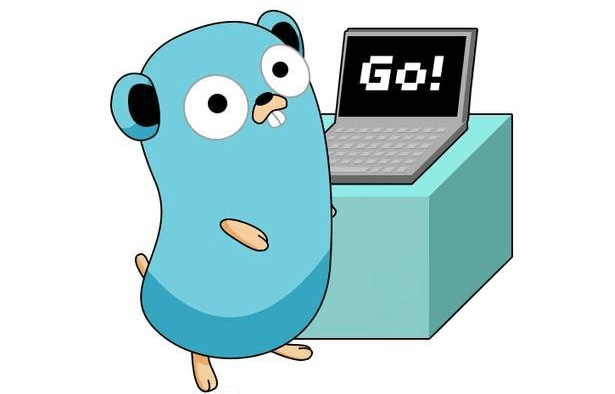

